In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [2]:
f = r.TFile("./gm2nearline_ana.root")
f.cd("CTvsTT/islands")
f.ls()

TFile**		./gm2nearline_ana.root	
 TFile*		./gm2nearline_ana.root	
  TDirectoryFile*		CTvsTT	CTvsTT (CTvsTTComparison) folder
   TDirectoryFile*		islands	islands
    KEY: TTree	islandTree;1	Tree of xtal traces
    KEY: TH1D	hCrystalSums;1	Sum of all differences (abs. value) between same xtal in truncated/full calo banks
    KEY: TH1D	hMissedPulses;1	Crystals which have a pulse which is above our missedThreshold_ but was not in the truncated bank
   KEY: TDirectoryFile	islands;1	islands
  KEY: TDirectoryFile	nearlineHistTree;1	nearlineHistTree (CaloNearlineHistograms) folder
  KEY: TDirectoryFile	clusterTree;1	clusterTree (ClusterTree) folder
  KEY: TDirectoryFile	t0Analyzer;1	t0Analyzer (T0PulseProcessorAnalyzer) folder
  KEY: TDirectoryFile	ibmsAnalyzer;1	ibmsAnalyzer (IBMSAnalyzer) folder
  KEY: TDirectoryFile	CoincidenceFinderLM;1	CoincidenceFinderLM (CoincidenceFinderLM) folder
  KEY: TDirectoryFile	islands;1	islands (CaloIslandAnalyzer) folder
  KEY: TDirectoryFile	CTvsTT;1	CTvsTT 

Warning in <TClass::Init>: no dictionary for class gm2aux::IBMSRawArtRecord is available


In [3]:
h = f.Get("CTvsTT").Get("islands").Get("hCrystalSums").Clone()

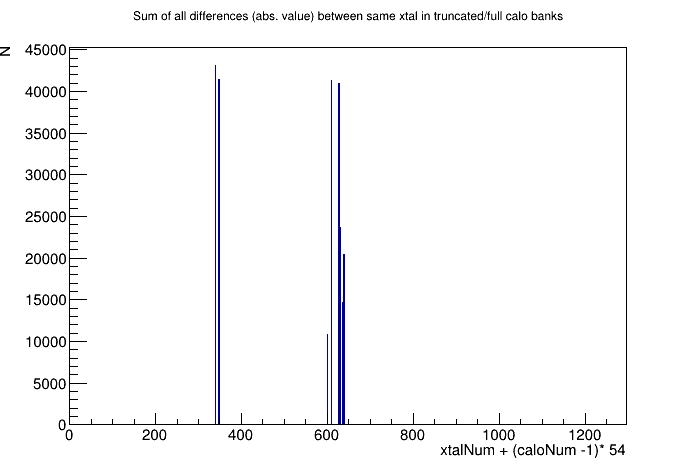

In [4]:
c = r.TCanvas()
h.Draw("hist")
c.Draw()

In [5]:
for i in range(1,h.GetNbinsX()+1):
    content = h.GetBinContent(i)
    if(content > 0):
        globalXtal = int(h.GetBinCenter(i) - 0.5)
        calo = int(np.floor(globalXtal / 54) + 1)
        xtal = globalXtal % 54 - 1
        print(i,globalXtal)
        print("xtal", i-1, "( ", calo, "/",xtal, ") in bin", h.FindBin(globalXtal), "with content", h.GetBinContent(h.FindBin(globalXtal)))

340 339
xtal 339 (  7 / 14 ) in bin 340 with content 43161.0
348 347
xtal 347 (  7 / 22 ) in bin 348 with content 41455.0
601 600
xtal 600 (  12 / 5 ) in bin 601 with content 10844.0
610 609
xtal 609 (  12 / 14 ) in bin 610 with content 41283.0
628 627
xtal 627 (  12 / 32 ) in bin 628 with content 40929.0
630 629
xtal 629 (  12 / 34 ) in bin 630 with content 23688.0
637 636
xtal 636 (  12 / 41 ) in bin 637 with content 14724.0
639 638
xtal 638 (  12 / 43 ) in bin 639 with content 20446.0


---

In [6]:
hMissed = f.Get("CTvsTT").Get("islands").Get("hMissedPulses").Clone()

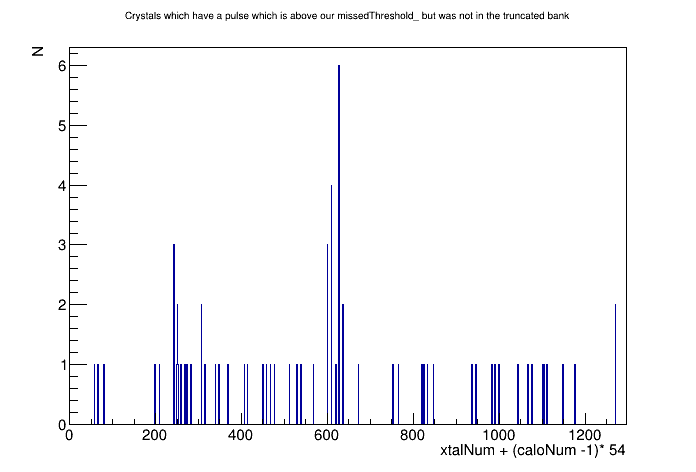

In [7]:
c = r.TCanvas()
hMissed.Draw("hist")
c.Draw()

---

In [8]:
t = f.Get("CTvsTT/islands/islandTree") #full calo islands
tt = f.Get("islands/islands/islandTree") #full calo islands 

In [9]:
t.Print()

******************************************************************************
*Tree    :islandTree: Tree of xtal traces                                    *
*Entries :     2424 : Total =        14629293 bytes  File  Size =    5082544 *
*        :          : Tree compression factor =   2.87                       *
******************************************************************************
*Br    0 :xtal0     : vector<short>                                          *
*Entries :     2424 : Total  Size=     196037 bytes  File Size  =      81395 *
*Baskets :        7 : Basket Size=      32000 bytes  Compression=   2.40     *
*............................................................................*
*Br    1 :xtal0_diff : vector<short>                                         *
*Entries :     2424 : Total  Size=      49117 bytes  File Size  =       6569 *
*Baskets :        2 : Basket Size=      32000 bytes  Compression=   7.40     *
*...................................................

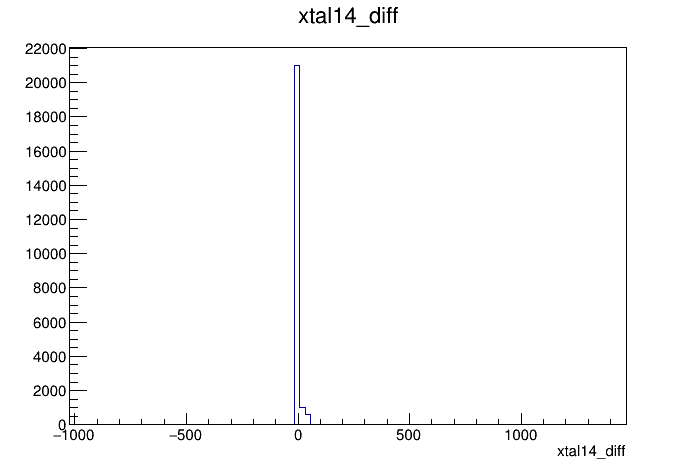

In [10]:
c = r.TCanvas()
t.Draw("xtal14_diff")
c.Draw()

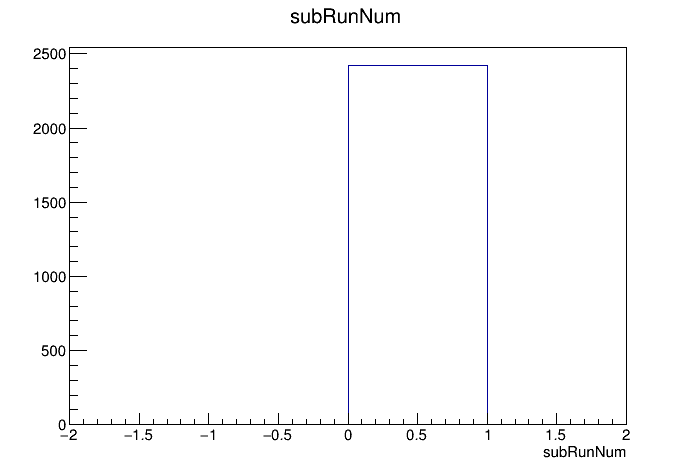

In [11]:
c = r.TCanvas()
t.Draw("subRunNum")
c.Draw()

2367600000000020000600004


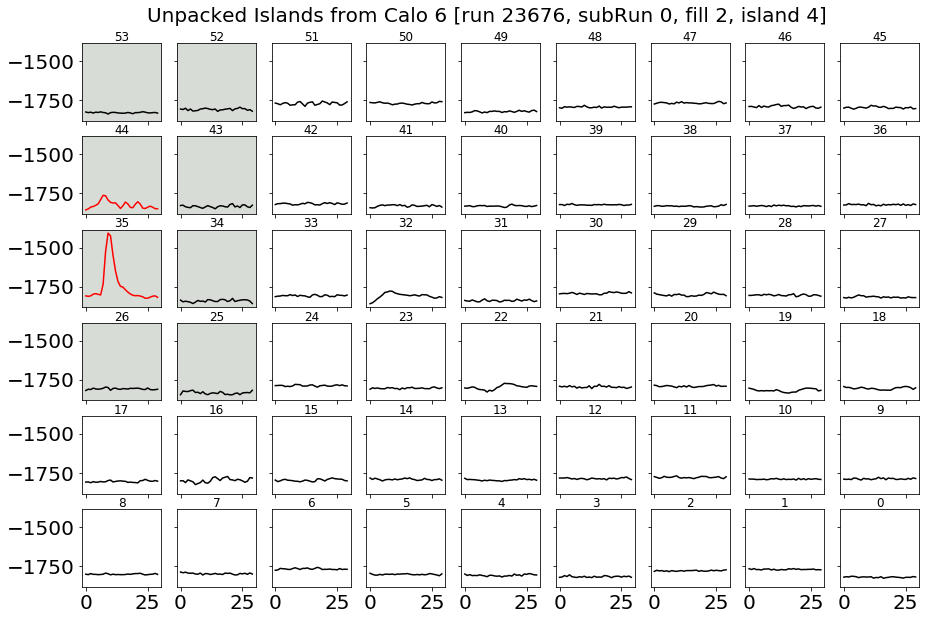

In [12]:
time = 27085
calo = 6
xtal = 34
uniqueID = 0
fillNum = 0
for i, e in enumerate(t):
    if(e.islandStart == time and e.caloNum == calo):
        uniqueID = constructUniqueIDwave(e)
        fullNum = e.fillNum
print(uniqueID)
islandPlotWaveOnly(uniqueID,t,False)

In [13]:
uniqueID = 0
for i, e in enumerate(tt):
    if(e.islandStart == time and e.caloNum == calo and e.fillNum == 2):
        uniqueID = constructUniqueIDwave(e)
print(uniqueID)
if(uniqueID > 0):
    islandPlotWaveOnly(uniqueID,tt,False)

0


In [15]:
runNum = 23676
subrunNum = 0
caloNum = 6
fill = 2

23676 0 6 2 0
28401.0
0.0
2367600000000020000600000 2367600000000020000600000
1 1
Island Start Time (Truncated):  28401.0 c.t. with length 28.0
Island Start Time (Full):  28401.0 c.t, with length 32.0


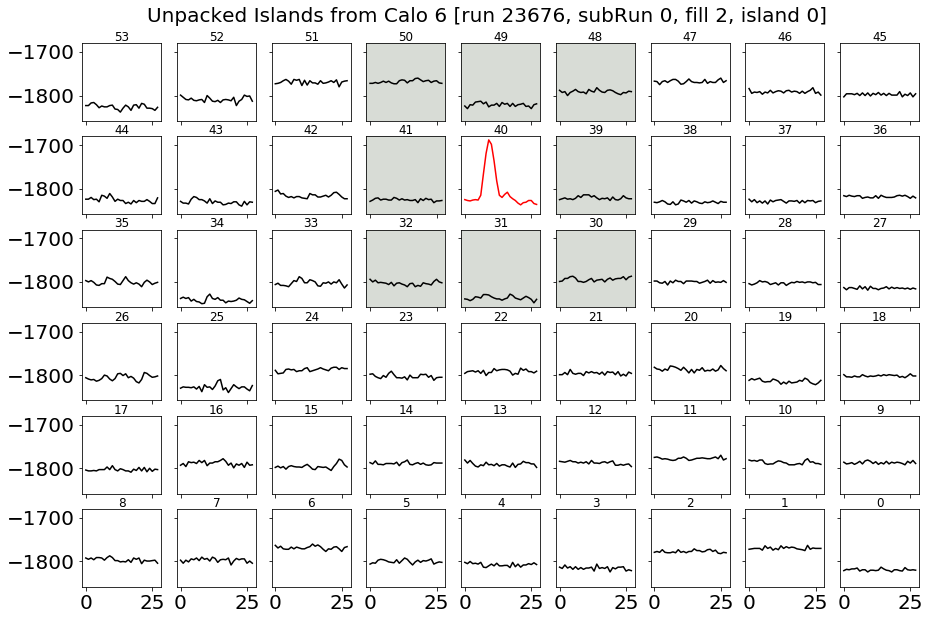

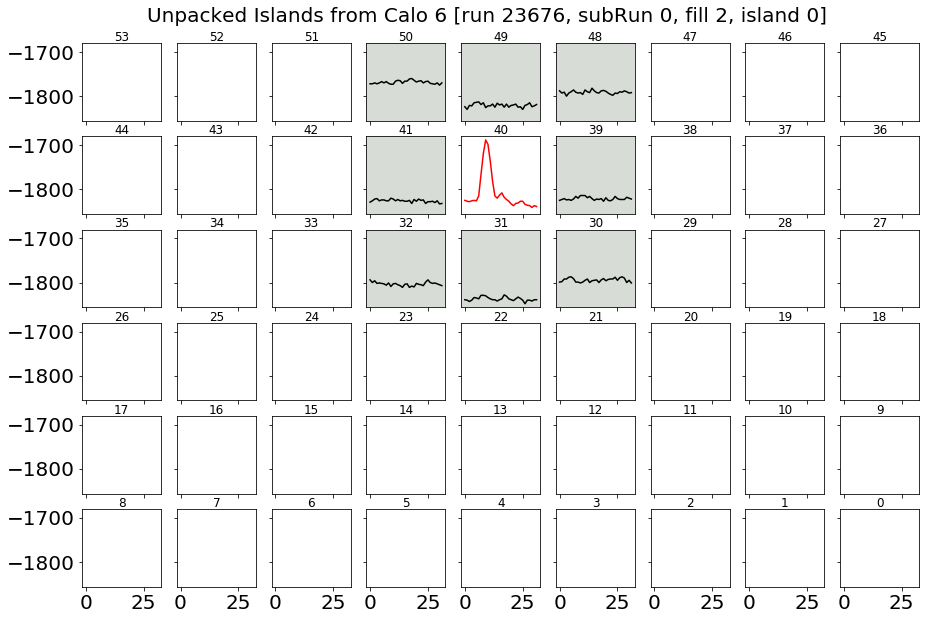

********************************************************************************************************
23676 0 6 2 1
29544.0
1.0
2367600000000020000600001 2367600000000020000600001
1 1
Island Start Time (Truncated):  29544.0 c.t. with length 29.0
Island Start Time (Full):  29544.0 c.t, with length 33.0


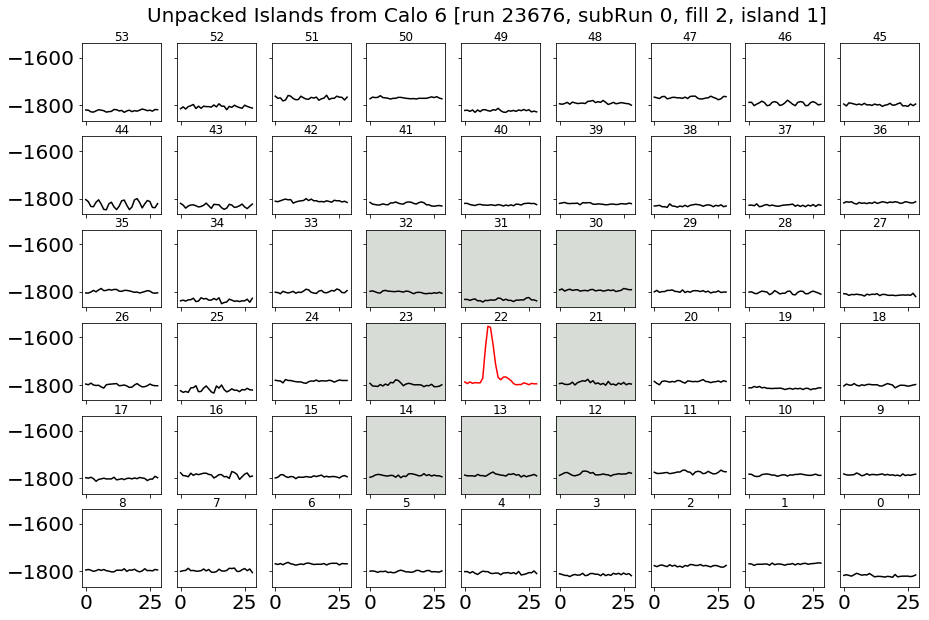

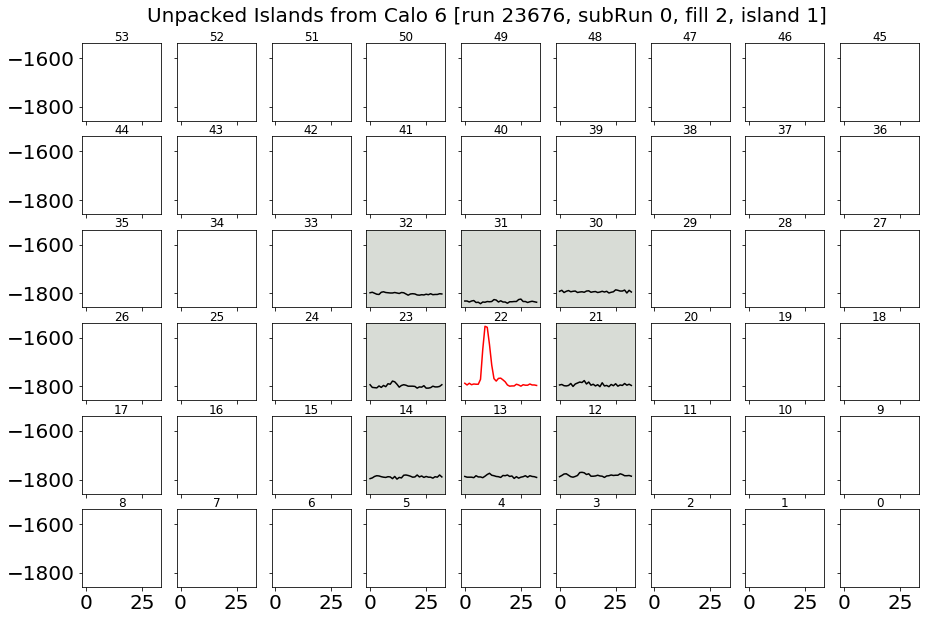

********************************************************************************************************
23676 0 6 2 2
29117.0
2.0
2367600000000020000600002 2367600000000020000600002
1 1
Island Start Time (Truncated):  29117.0 c.t. with length 29.0
Island Start Time (Full):  29117.0 c.t, with length 33.0


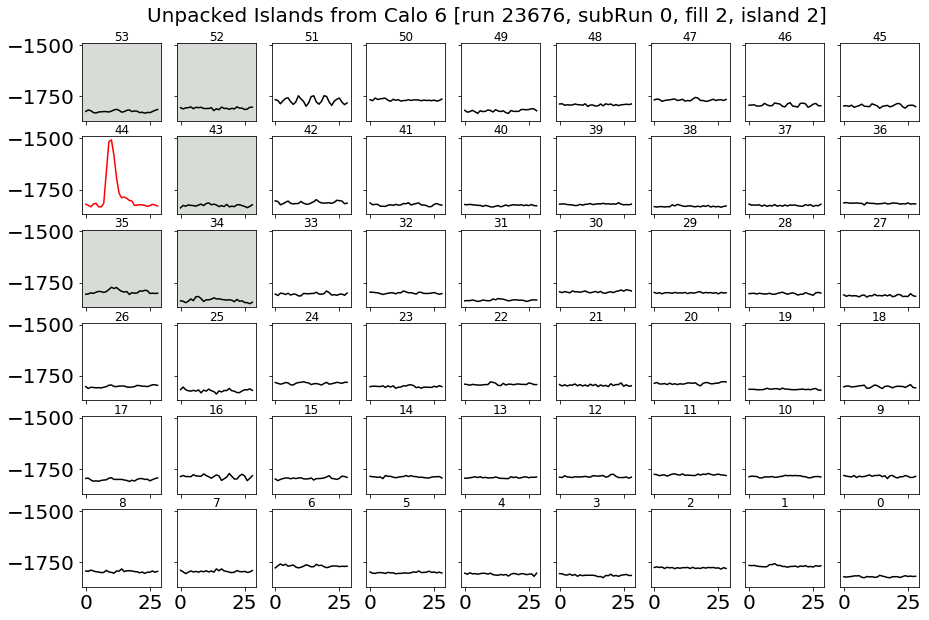

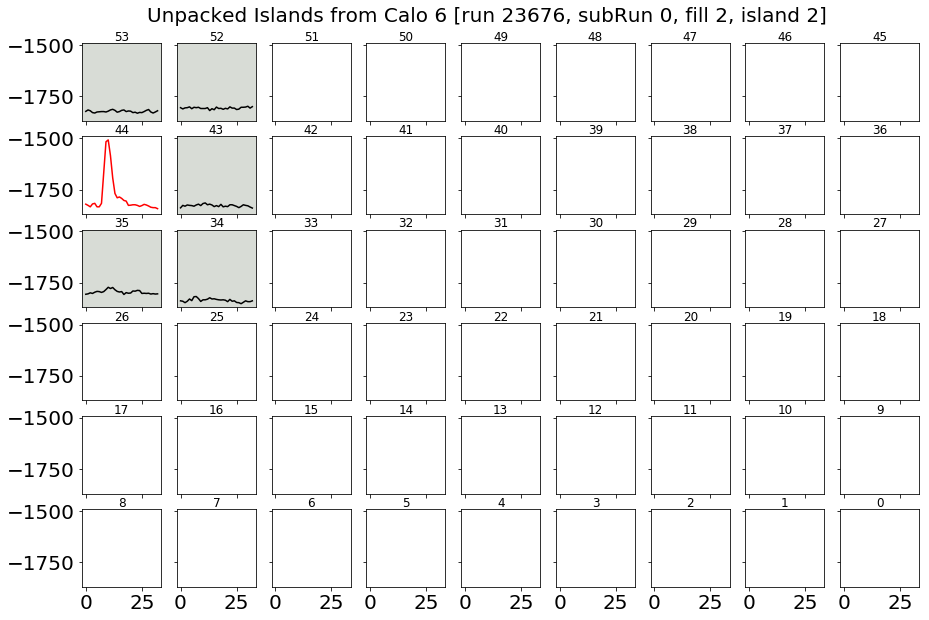

********************************************************************************************************
23676 0 6 2 3
27752.0
3.0
2367600000000020000600003 2367600000000020000600003
1 1
Island Start Time (Truncated):  27752.0 c.t. with length 30.0
Island Start Time (Full):  27752.0 c.t, with length 34.0


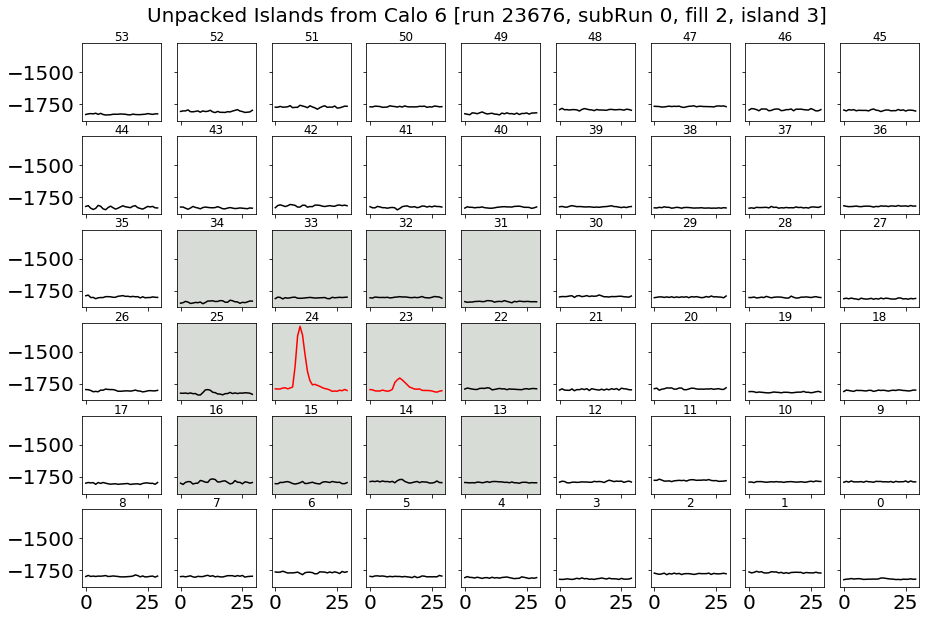

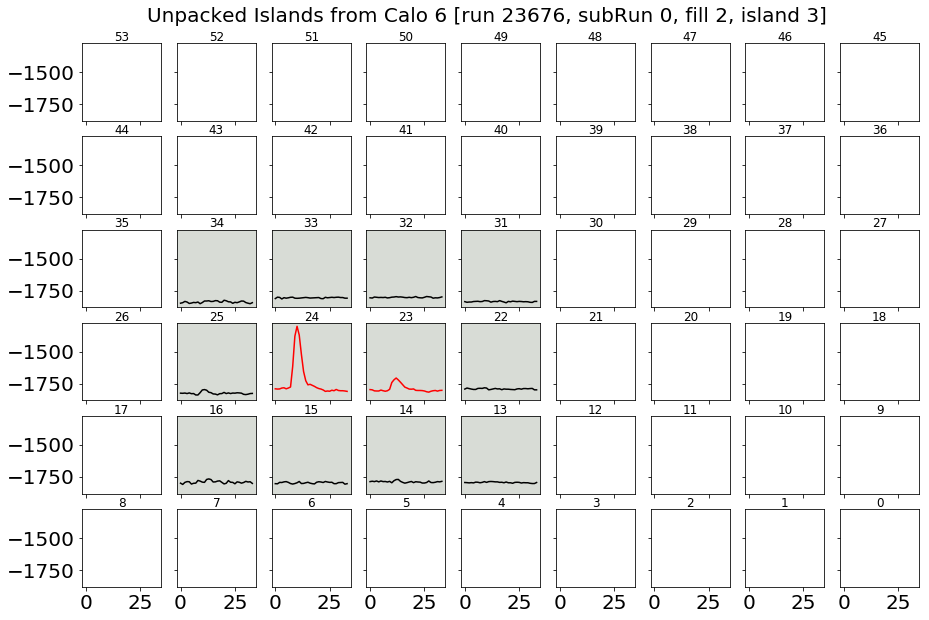

********************************************************************************************************
23676 0 6 2 4
27085.0
0 1
Island Start Time (Truncated):  27085.0 c.t. with length 30.0
Island Start Time (Full):  27752.0 c.t, with length 34.0


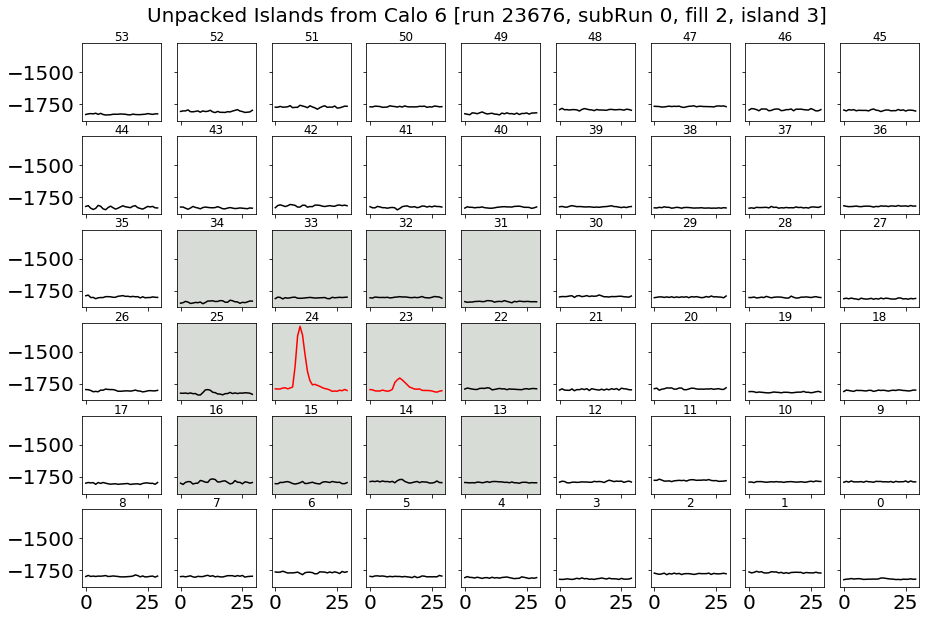

********************************************************************************************************
23676 0 6 2 5
29312.0
4.0
2367600000000020000600005 2367600000000020000600004
1 1
Island Start Time (Truncated):  29312.0 c.t. with length 31.0
Island Start Time (Full):  29312.0 c.t, with length 35.0


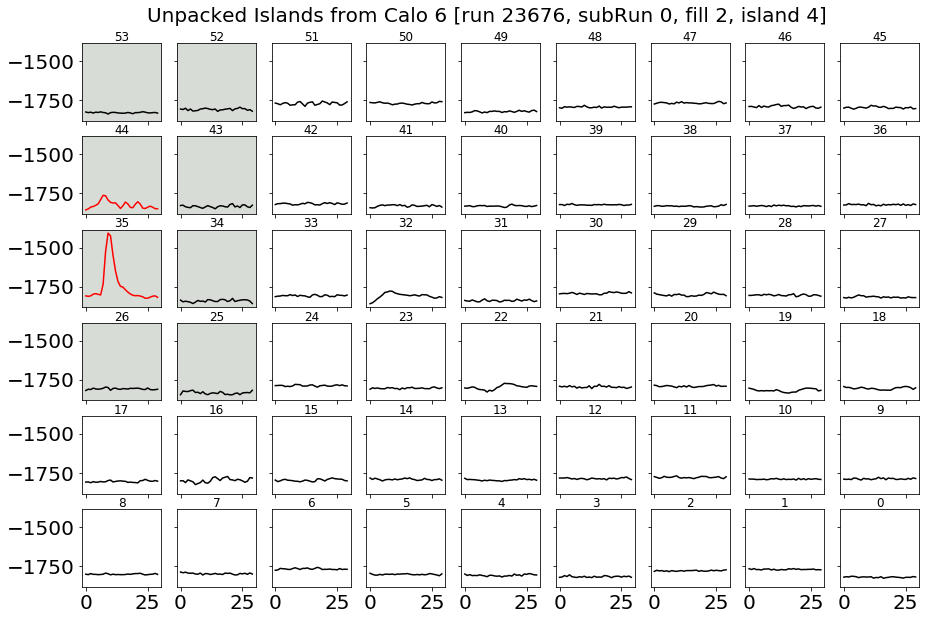

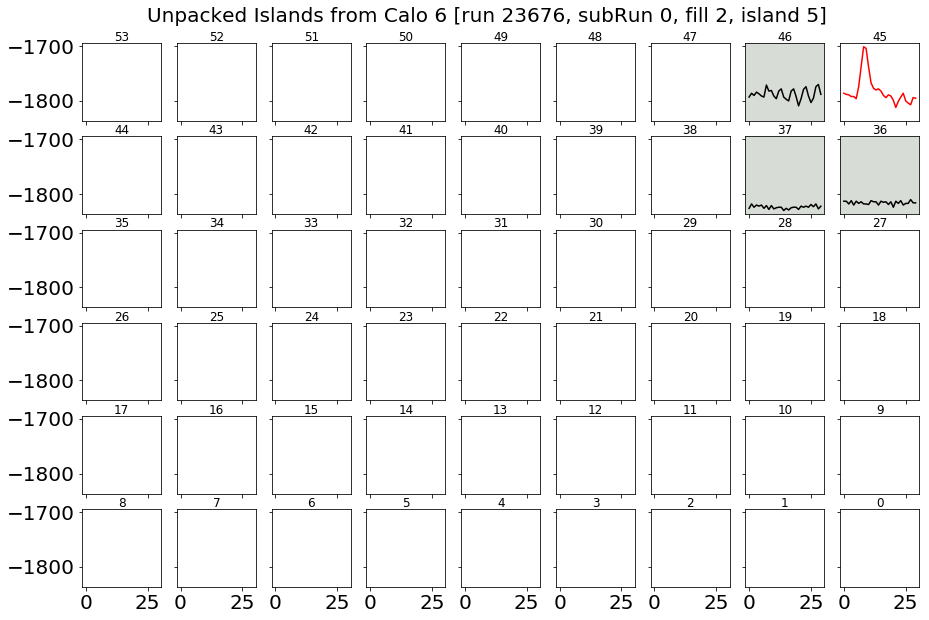

********************************************************************************************************
23676 0 6 2 6
43570.0
5.0
2367600000000020000600006 2367600000000020000600005
1 1
Island Start Time (Truncated):  43570.0 c.t. with length 26.0
Island Start Time (Full):  43570.0 c.t, with length 30.0


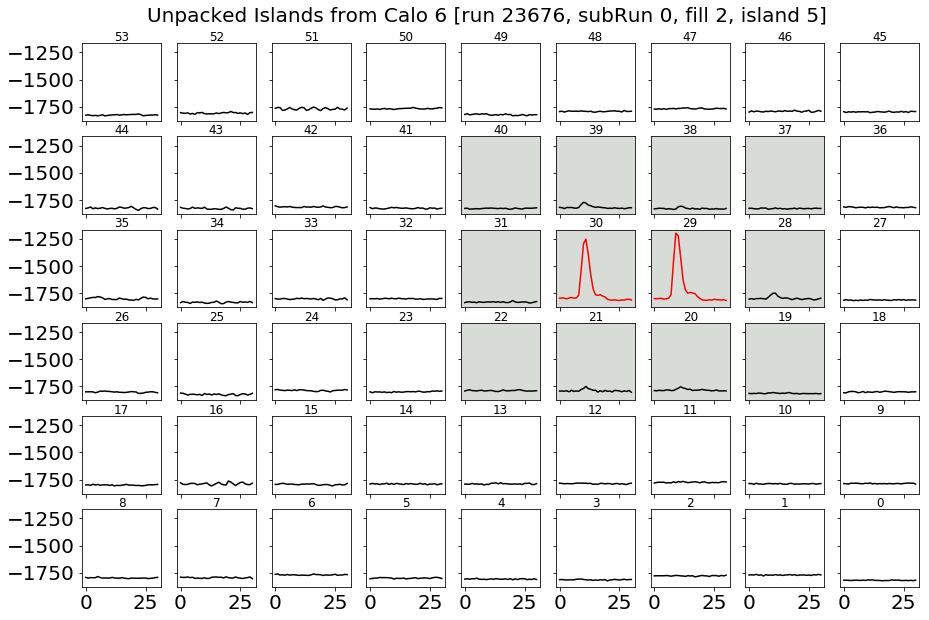

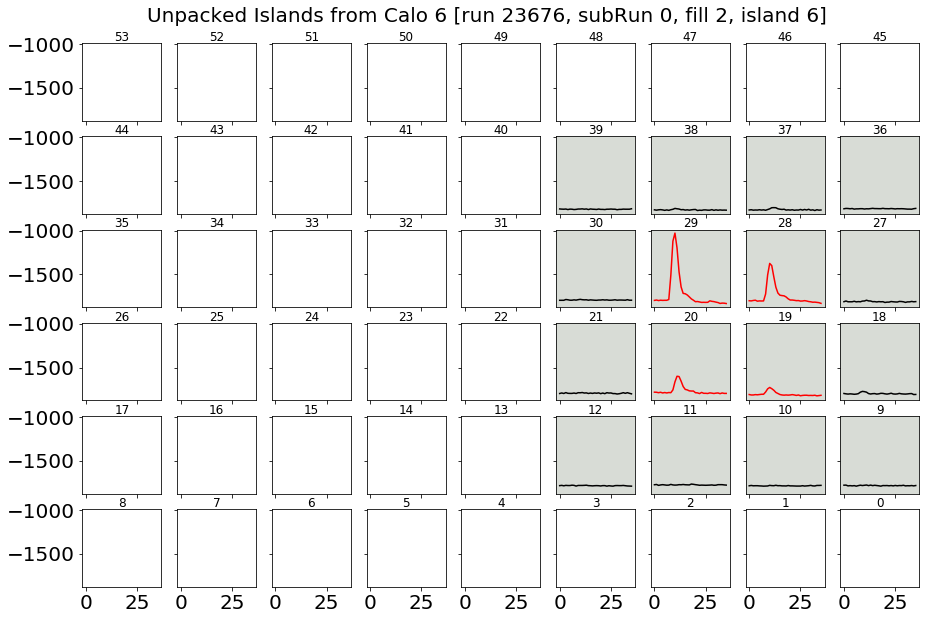

********************************************************************************************************
23676 0 6 2 7
27441.0
11.0
2367600000000020000600007 2367600000000020000600011
1 1
Island Start Time (Truncated):  27441.0 c.t. with length 32.0
Island Start Time (Full):  27441.0 c.t, with length 36.0


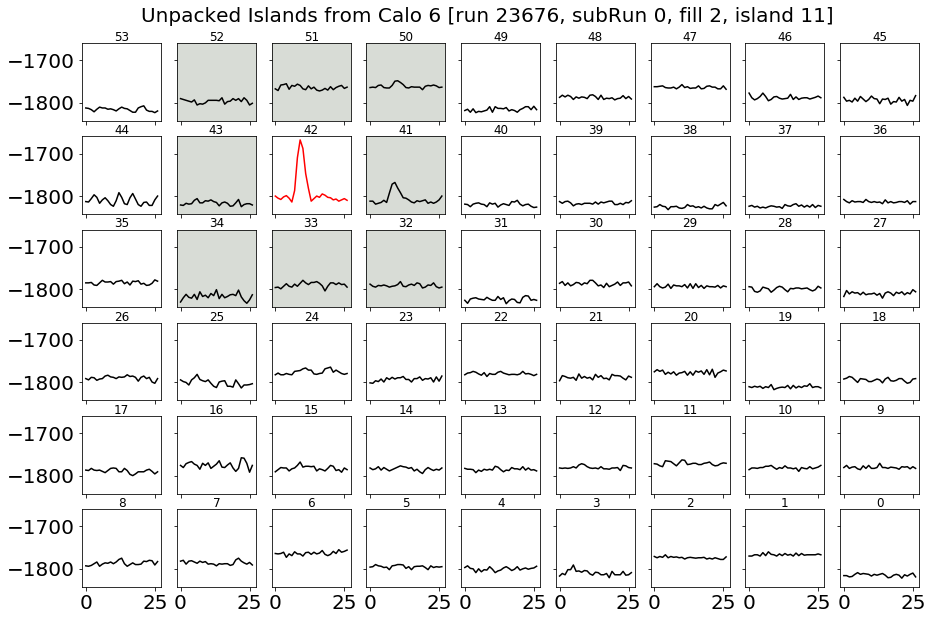

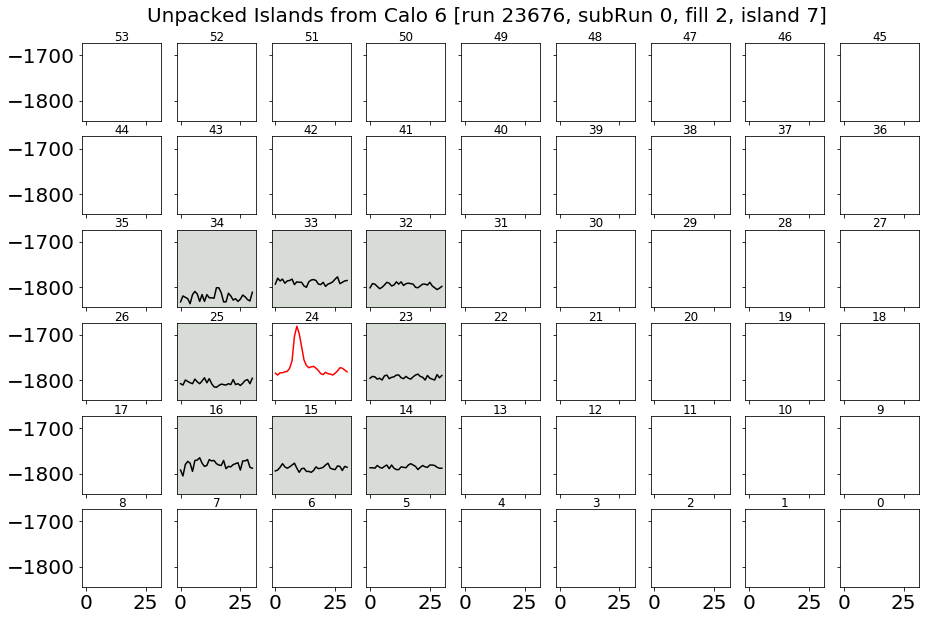

********************************************************************************************************
23676 0 6 2 8
38886.0
7.0
2367600000000020000600008 2367600000000020000600007
1 1
Island Start Time (Truncated):  38886.0 c.t. with length 27.0
Island Start Time (Full):  38886.0 c.t, with length 31.0


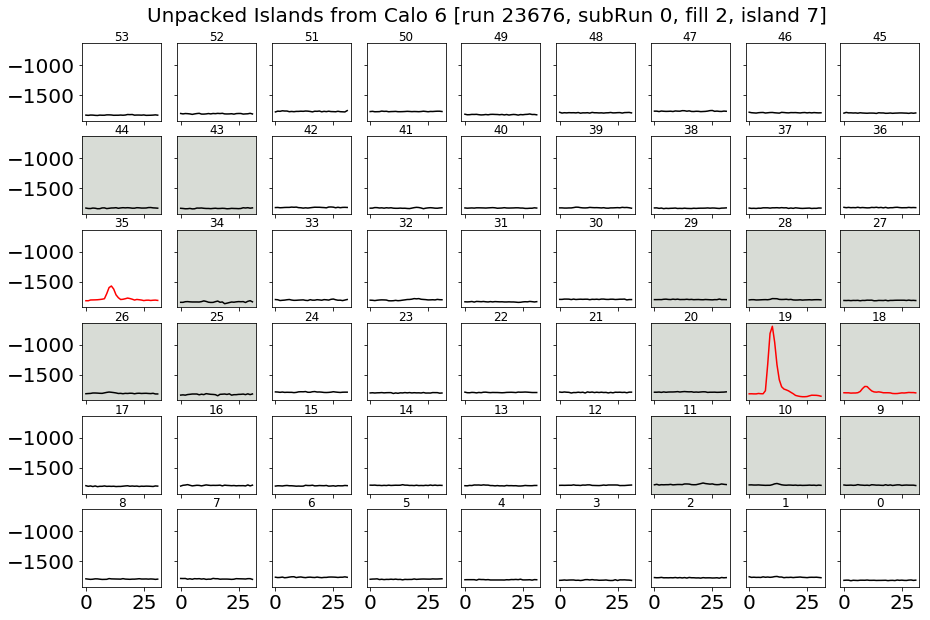

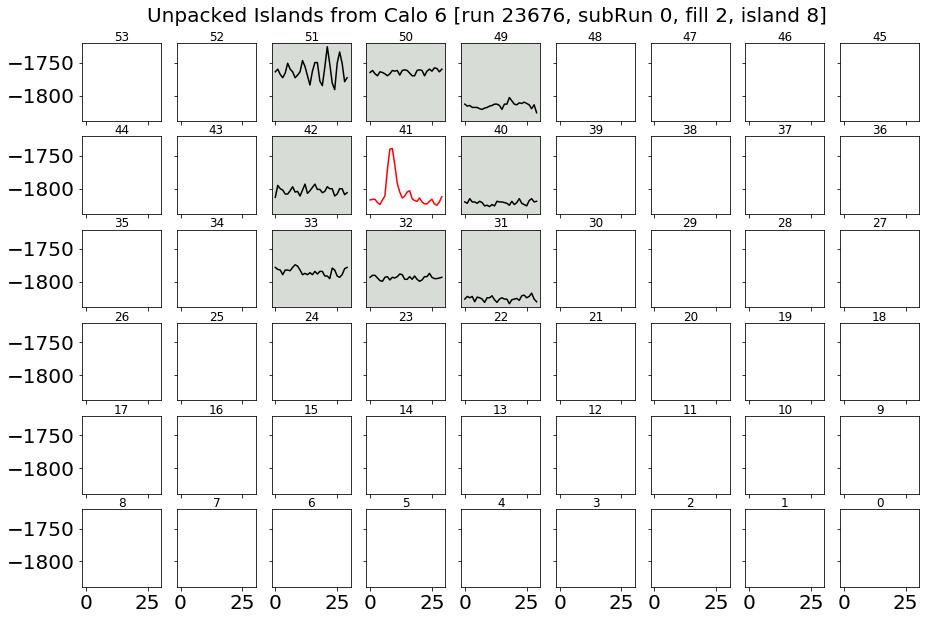

********************************************************************************************************
23676 0 6 2 9
29902.0
6.0
2367600000000020000600009 2367600000000020000600006
1 1
Island Start Time (Truncated):  29902.0 c.t. with length 32.0
Island Start Time (Full):  29902.0 c.t, with length 36.0


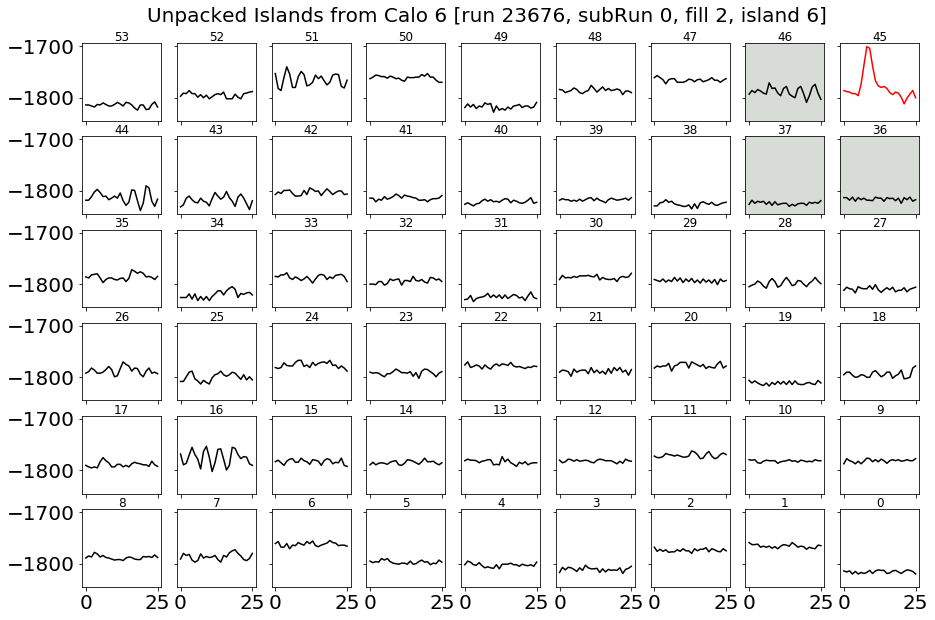

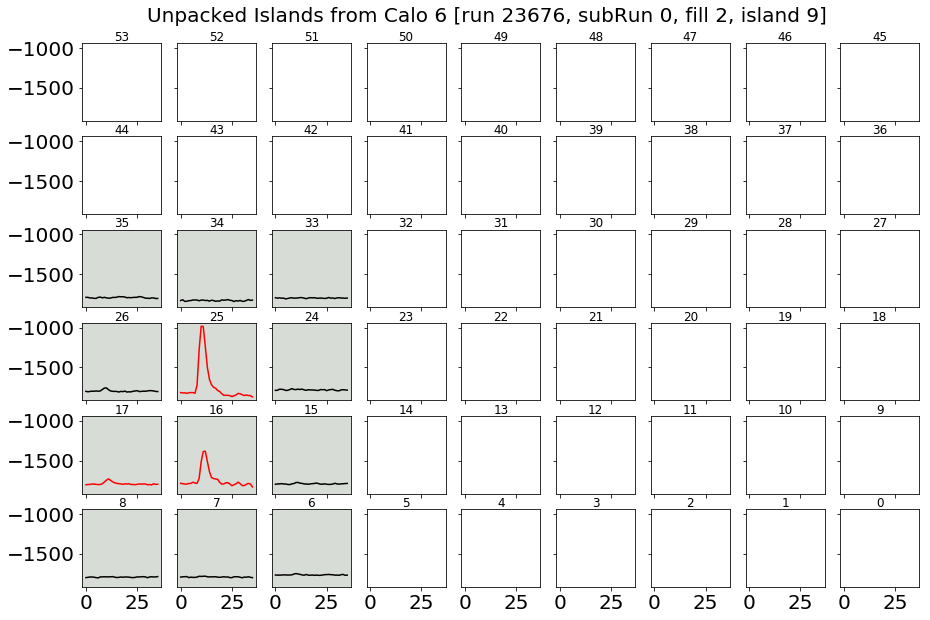

********************************************************************************************************
23676 0 6 2 10
39254.0
28.0
2367600000000020000600010 2367600000000020000600028
1 1
Island Start Time (Truncated):  39254.0 c.t. with length 28.0
Island Start Time (Full):  39254.0 c.t, with length 32.0


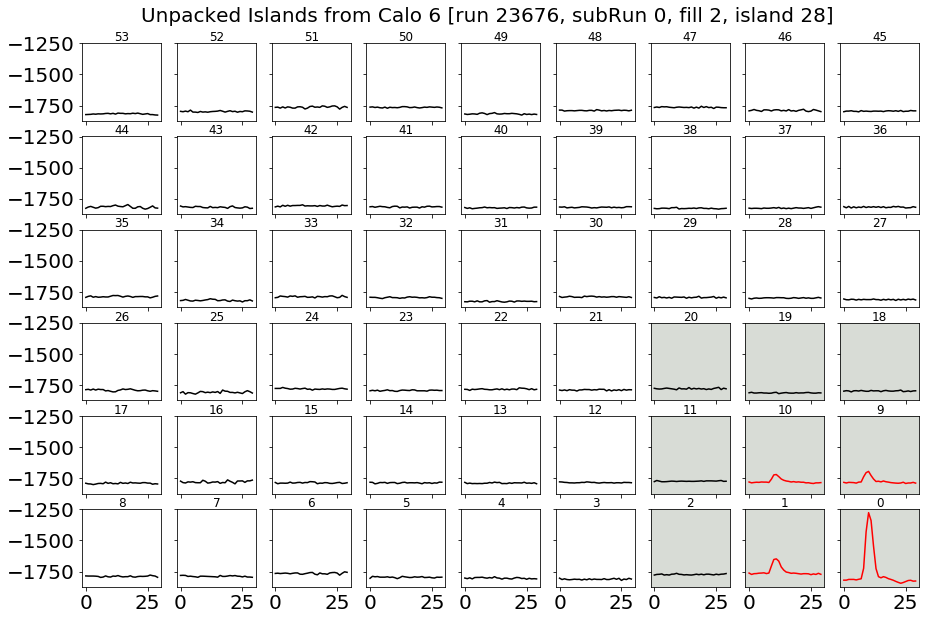

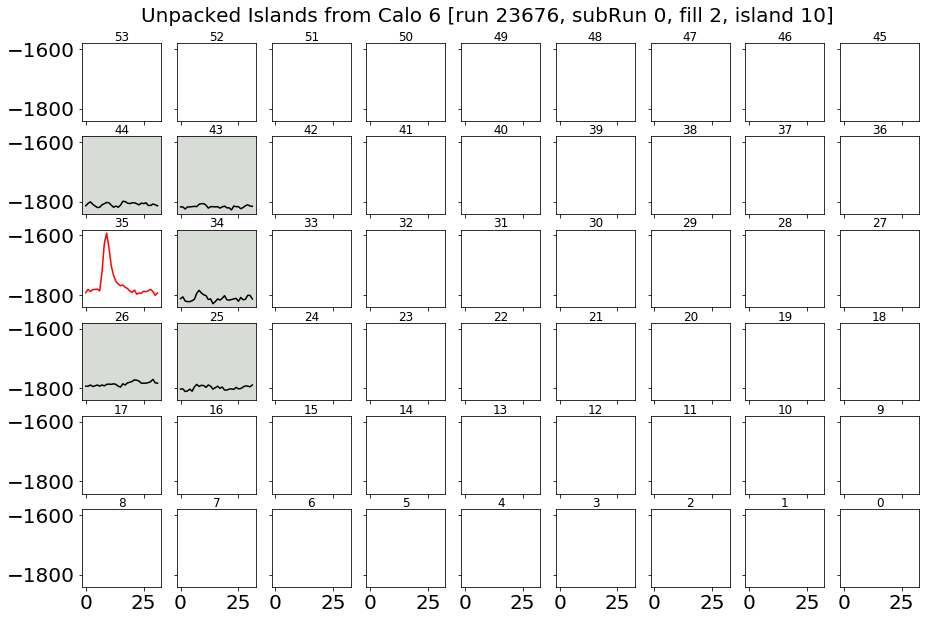

********************************************************************************************************
23676 0 6 2 11
44426.0
15.0
2367600000000020000600011 2367600000000020000600015
1 1
Island Start Time (Truncated):  44426.0 c.t. with length 27.0
Island Start Time (Full):  44426.0 c.t, with length 31.0


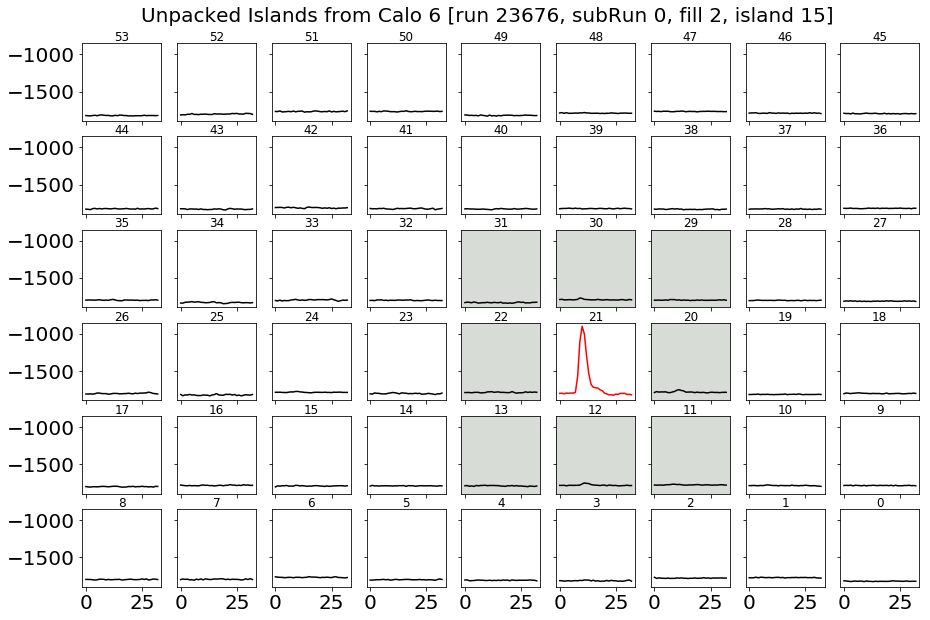

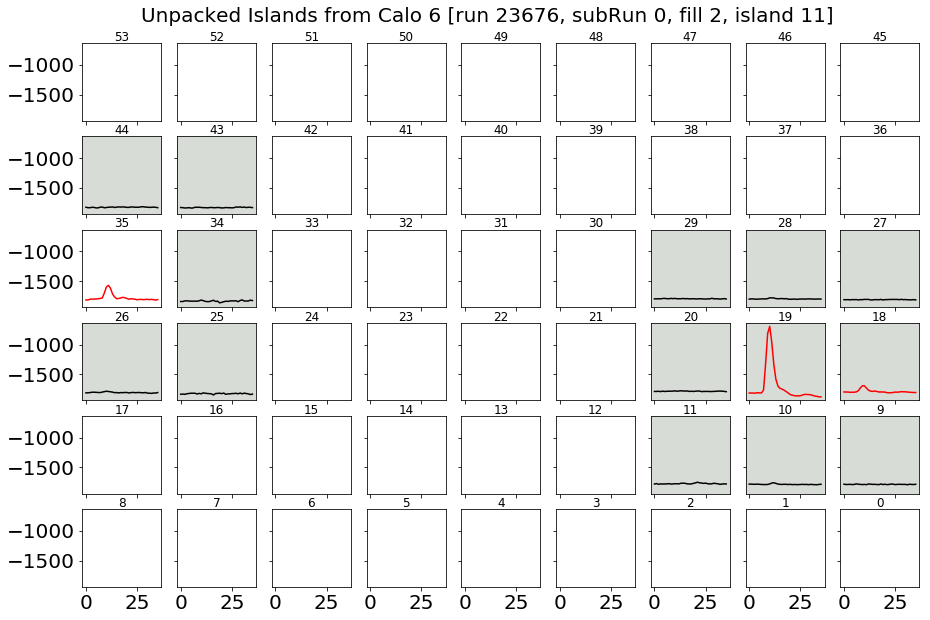

********************************************************************************************************
23676 0 6 2 12
54087.0
8.0
2367600000000020000600012 2367600000000020000600008
1 1
Island Start Time (Truncated):  54087.0 c.t. with length 26.0
Island Start Time (Full):  54087.0 c.t, with length 30.0


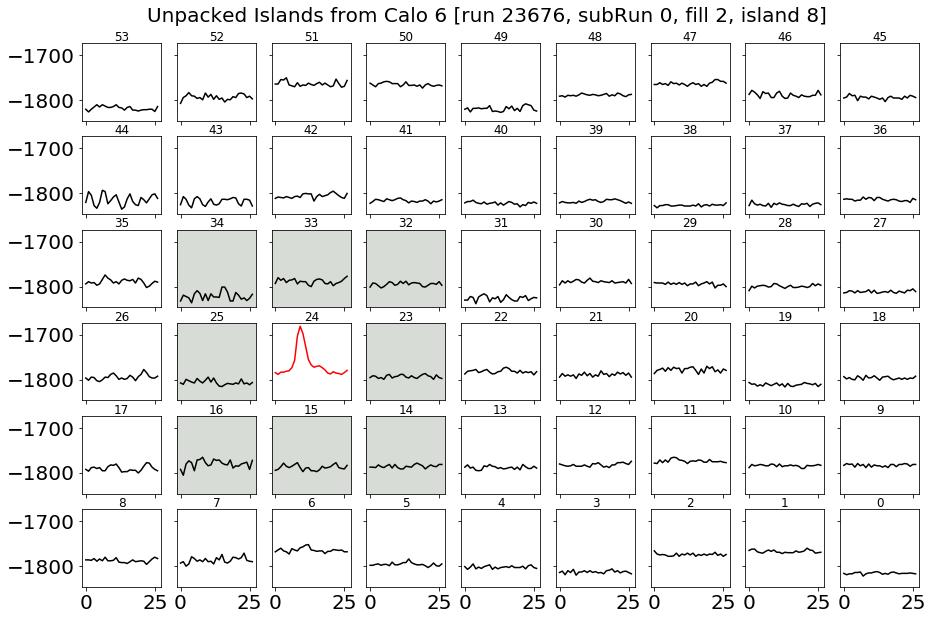

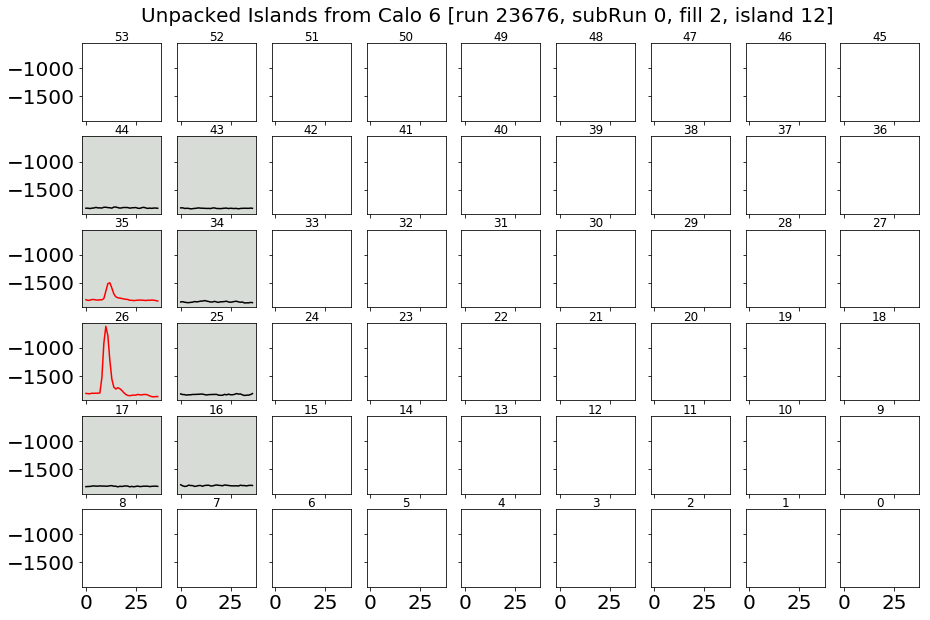

********************************************************************************************************
23676 0 6 2 13
34191.0
119.0
2367600000000020000600013 2367600000000020000600119
1 1
Island Start Time (Truncated):  34191.0 c.t. with length 28.0
Island Start Time (Full):  34191.0 c.t, with length 86.0


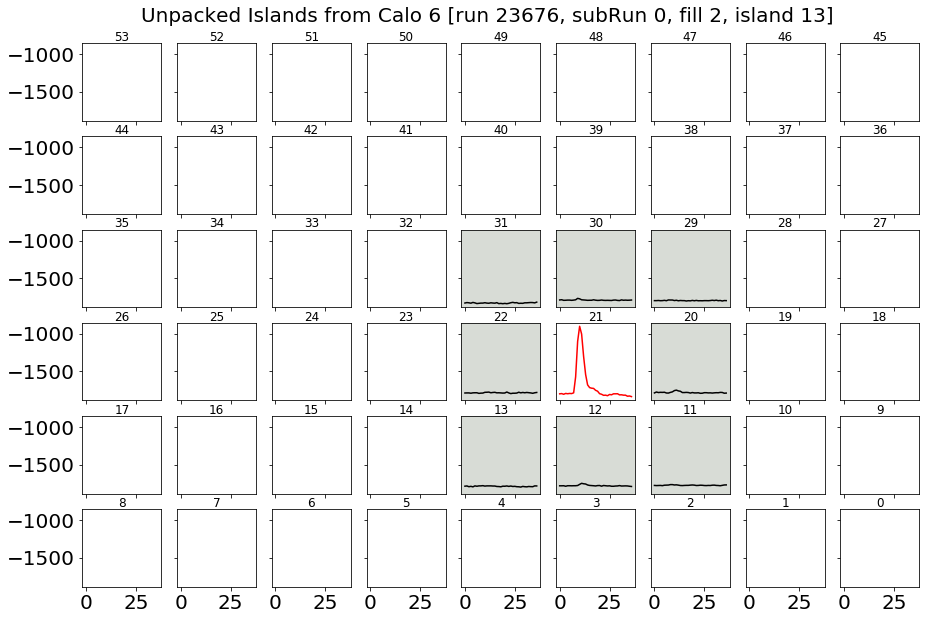

********************************************************************************************************
23676 0 6 2 14
30546.0
9.0
2367600000000020000600014 2367600000000020000600009
1 1
Island Start Time (Truncated):  30546.0 c.t. with length 32.0
Island Start Time (Full):  30546.0 c.t, with length 36.0


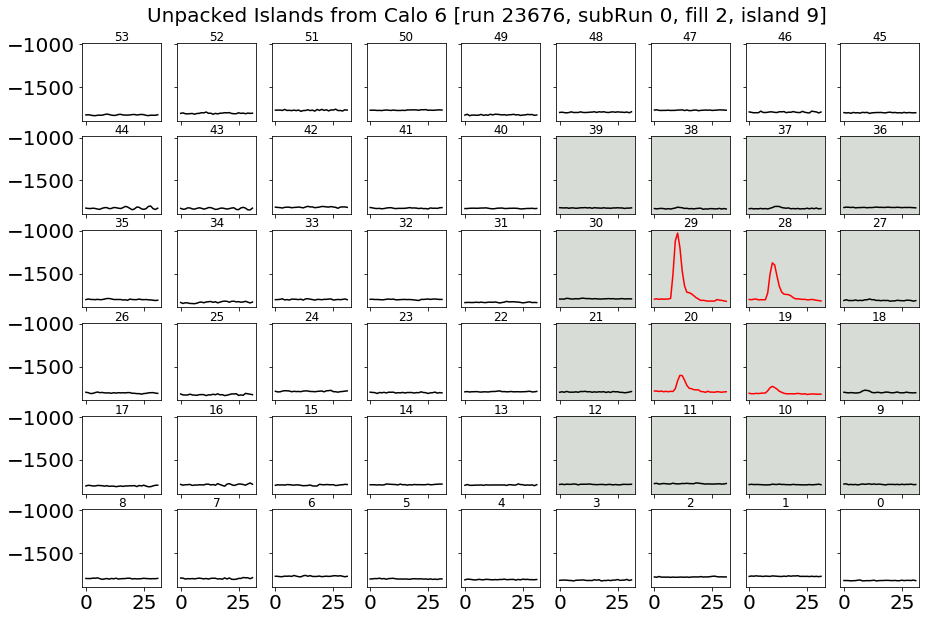

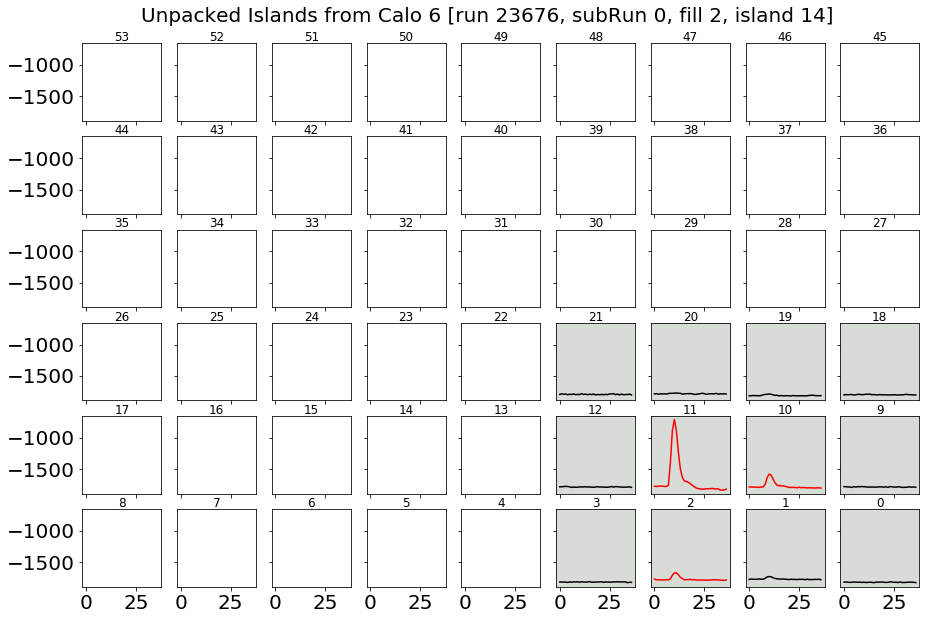

********************************************************************************************************
23676 0 6 2 15
30504.0
13.0
2367600000000020000600015 2367600000000020000600013
1 1
Island Start Time (Truncated):  30504.0 c.t. with length 33.0
Island Start Time (Full):  30504.0 c.t, with length 37.0


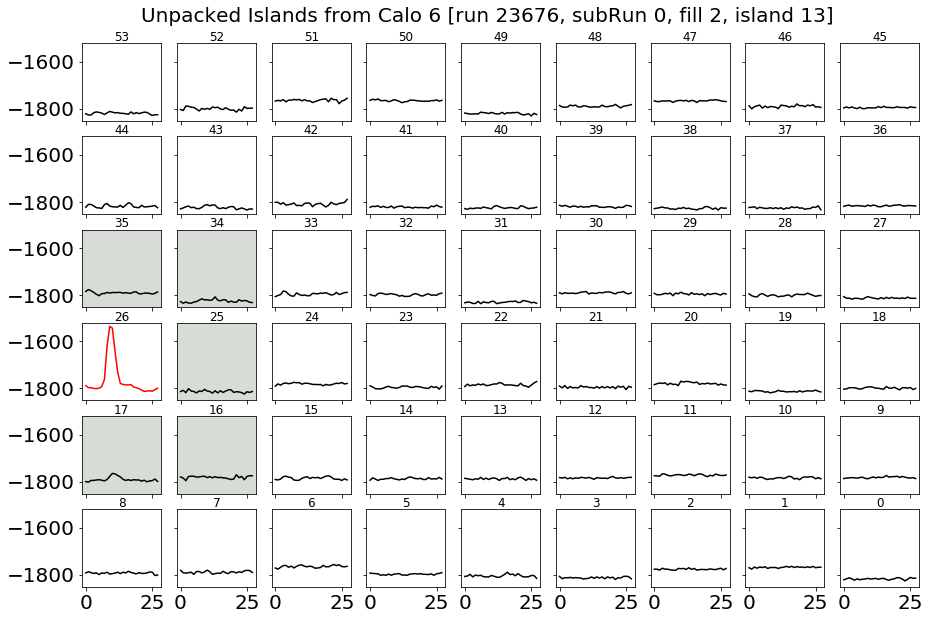

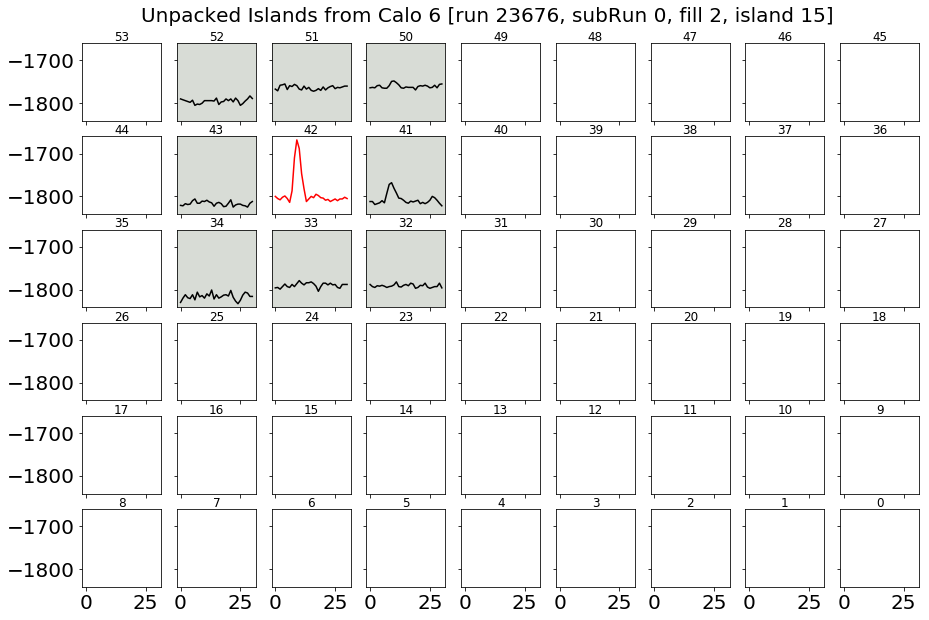

********************************************************************************************************
23676 0 6 2 16
53137.0
20.0
2367600000000020000600016 2367600000000020000600020
1 1
Island Start Time (Truncated):  53137.0 c.t. with length 28.0
Island Start Time (Full):  53137.0 c.t, with length 32.0


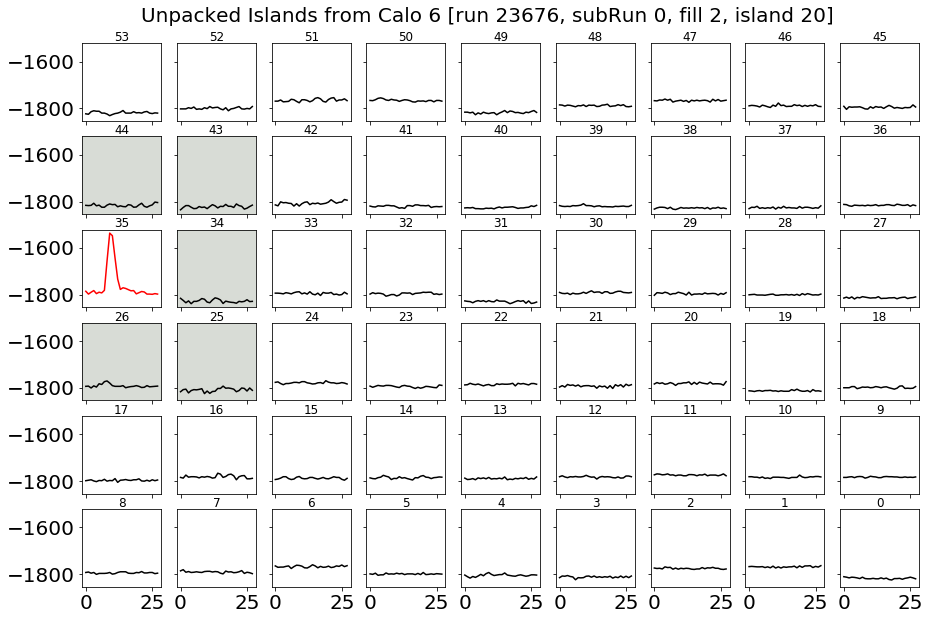

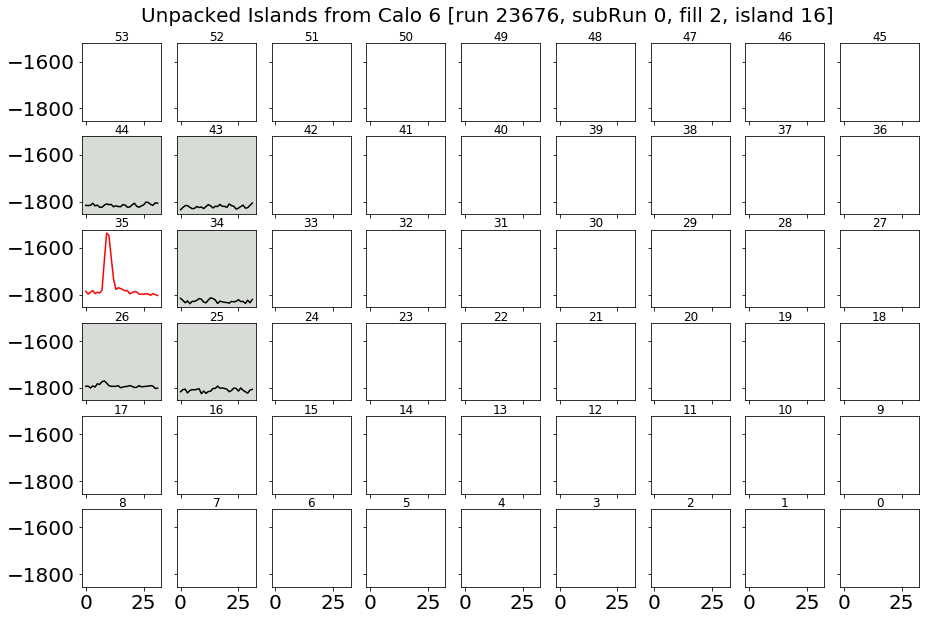

********************************************************************************************************
23676 0 6 2 17
29718.0
14.0
2367600000000020000600017 2367600000000020000600014
1 1
Island Start Time (Truncated):  29718.0 c.t. with length 33.0
Island Start Time (Full):  29718.0 c.t, with length 37.0


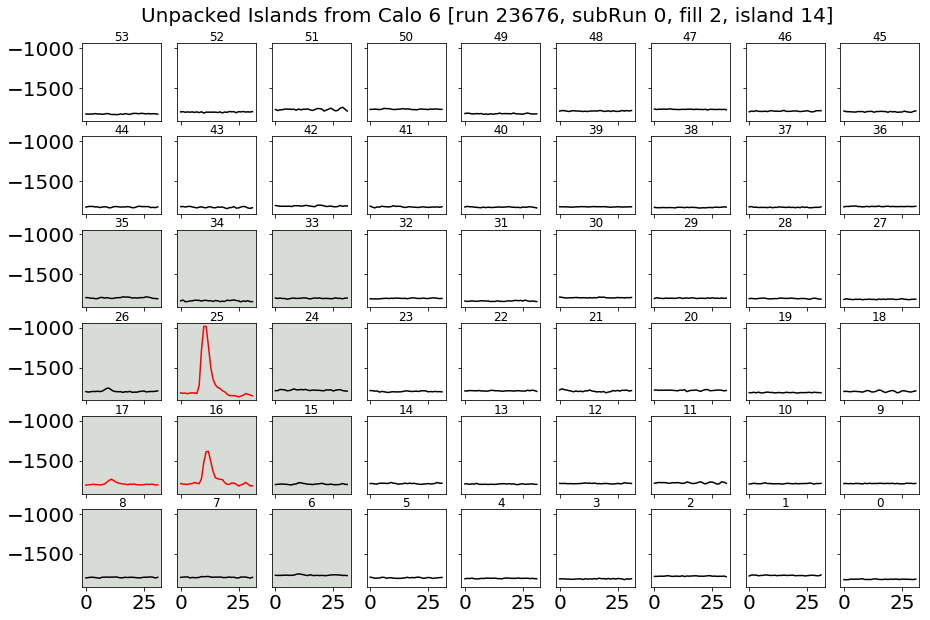

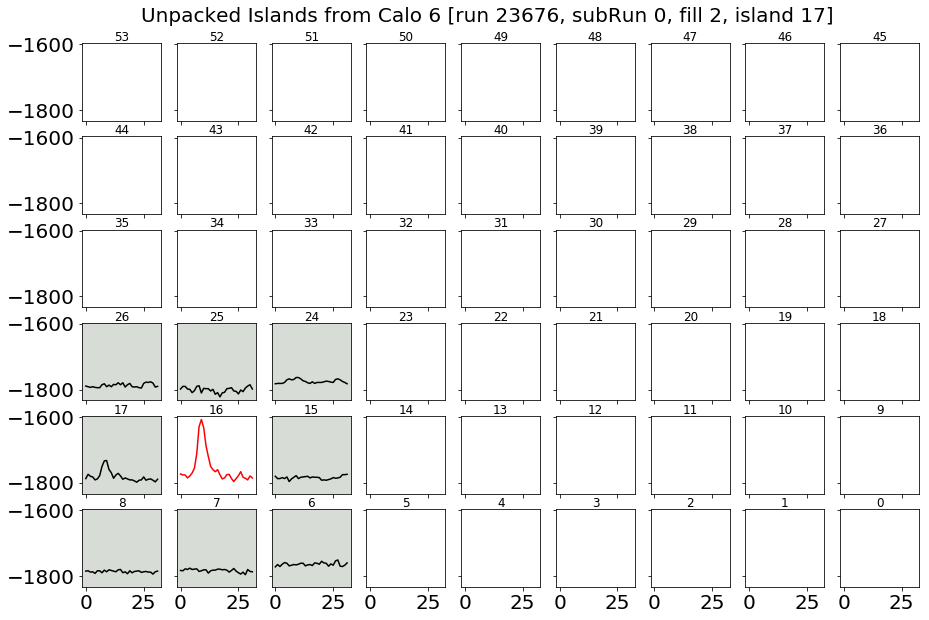

********************************************************************************************************
23676 0 6 2 18
38657.0
19.0
2367600000000020000600018 2367600000000020000600019
1 1
Island Start Time (Truncated):  38657.0 c.t. with length 28.0
Island Start Time (Full):  38657.0 c.t, with length 32.0


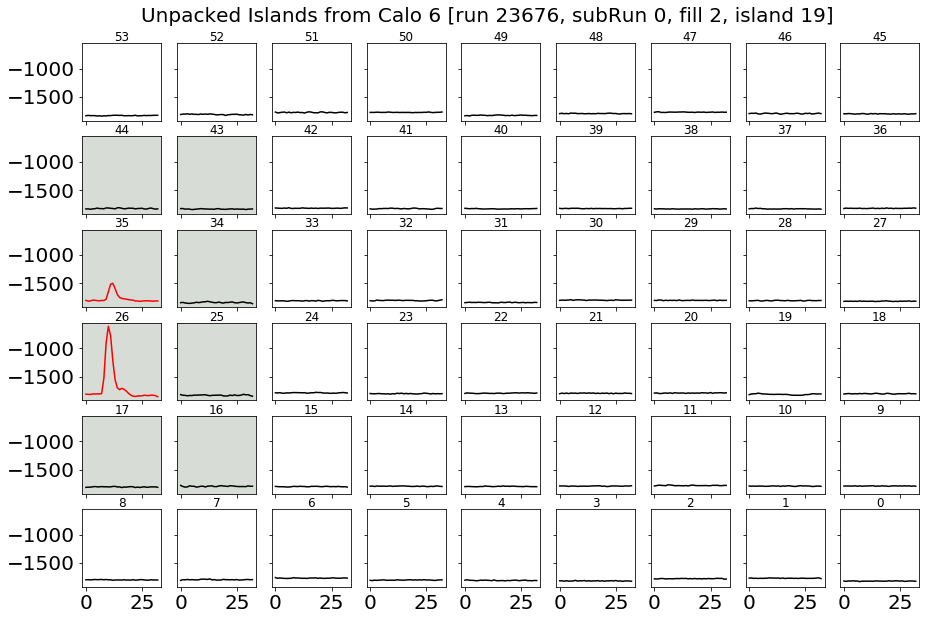

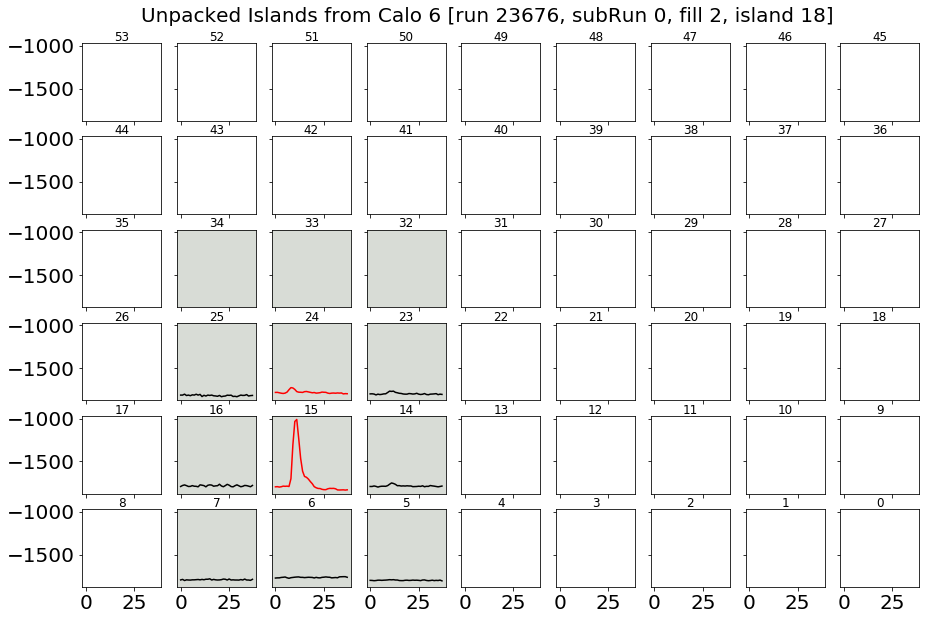

********************************************************************************************************
23676 0 6 2 19
27506.0
12.0
2367600000000020000600019 2367600000000020000600012
1 1
Island Start Time (Truncated):  27506.0 c.t. with length 33.0
Island Start Time (Full):  27506.0 c.t, with length 37.0


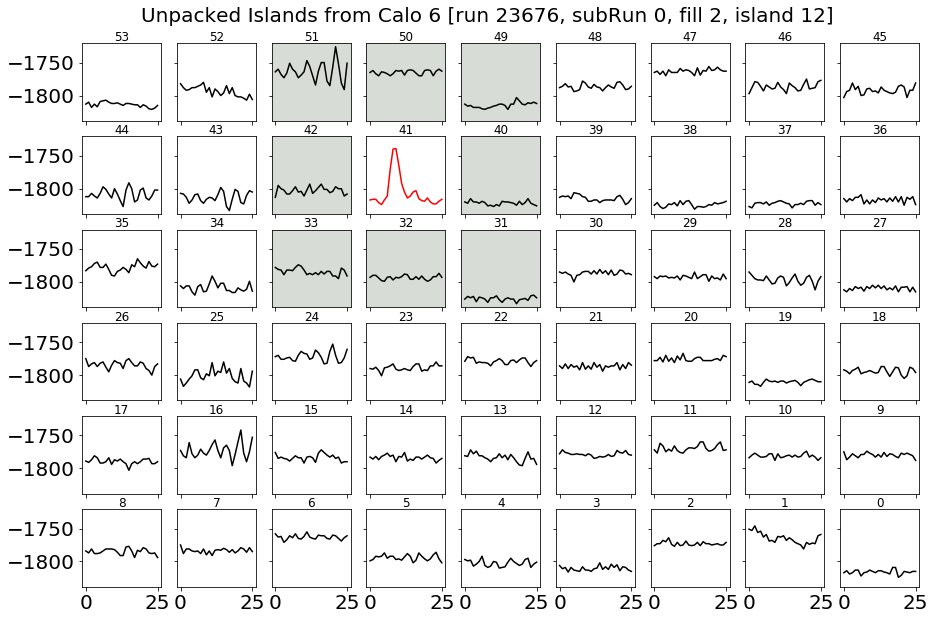

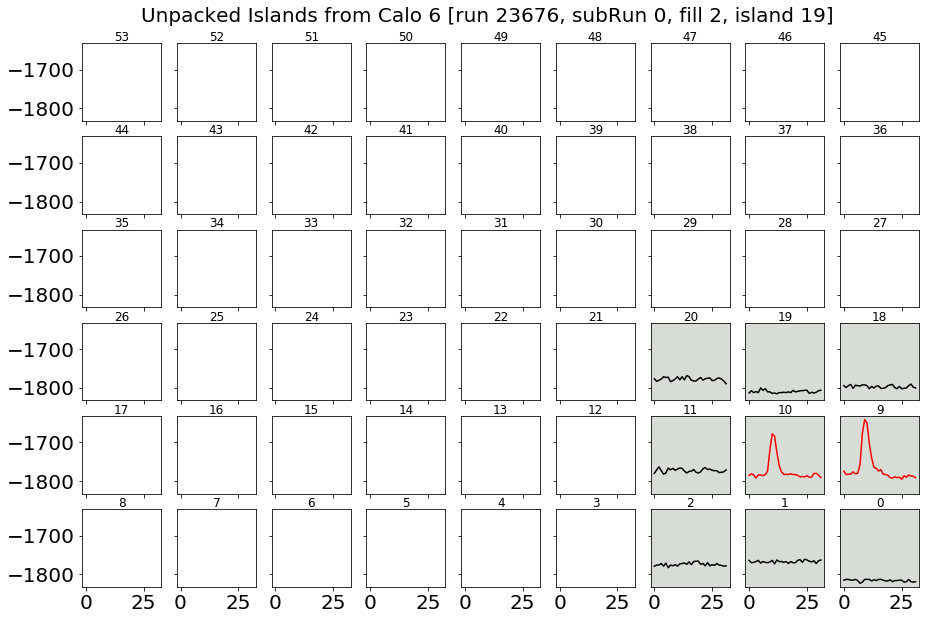

********************************************************************************************************


In [16]:
counter = 0
ctvec = []
ttvec = []

noint()
for island in range(20):
        
    print(runNum, subrunNum, caloNum, fill, island)
    uniqueID = int(str(runNum).zfill(5) + str(subrunNum).zfill(5) + str(fill).zfill(5) +
                            str(caloNum).zfill(5) + str(island).zfill(5)) 
    
    ne1 = t.Draw("islandStart:islandLength", constructConditionFromUniqueIDWave(uniqueID) , "goff")
    startTime = (t.GetV1())[0]
    print(startTime)
    #ne1 = t.Draw("islandStart:islandLength:islandNum", constructConditionFromUniqueIDWave(uniqueID) , "")
    ne2 = tt.Draw("islandStart:islandLength:islandNum",
                 "islandStart == "+str(int(startTime))+" && caloNum == "+str(caloNum)+" && fillNum == "+str(fill),
                 "goff")
    if(ne2>0):
        print(tt.GetV3()[0])
        uniqueID_time = int(str(runNum).zfill(5) + str(subrunNum).zfill(5) + str(fill).zfill(5) +
                                str(caloNum).zfill(5) + str(int(tt.GetV3()[0])).zfill(5)) 
        print(uniqueID, uniqueID_time)
    print(ne2, ne1)
    if(ne2 > 0 or ne1 > 0):    
        print("Island Start Time (Full): ", (t.GetV1())[0], "c.t. with length", (t.GetV2())[0])
        print("Island Start Time (Truncated): ", (tt.GetV1())[0], "c.t, with length", (tt.GetV2())[0])
        
        ctvec.append((t.GetV1())[0])
        ttvec.append((tt.GetV1())[0])
        
        if(ne1>0):
            islandPlotWaveOnly(uniqueID_time,t,False)
        if(ne2>0):
            islandPlotWaveOnly(uniqueID,tt, False)       
    
        counter += 1
    print("********************************************************************************************************")